In [2]:
import torch
import numpy as np
import Dataset
import importlib
import matplotlib.pyplot as plt


importlib.reload(Dataset)
EventContainer   = Dataset.EventContainer
DatasetContainer = Dataset.DatasetContainer
GraphDatasetContainer = Dataset.GraphDatasetContainer

def PLTParams(figsize = [10,10]):
    plt.rcParams['figure.figsize']=figsize
    plt.rcParams['font.size']=15
PLTParams()



In [3]:
DataPath = '/remote/tychodata/ftairli/work/Projects/Geometry_Reconstruction/Data/RawData/'

In [174]:
# Loading Dataset for Run010
dataset = DatasetContainer(0)
dataset.Load(DataPath,'Run010')

In [5]:
# Collecting the geometry information
Chi0 = dataset.GetValues('GenChi0')
Rp   = dataset.GetValues('GenRp')
T0   = dataset.GetValues('GenT0')

E    = dataset.GetValues('GenLogE')

# Distribution Plots

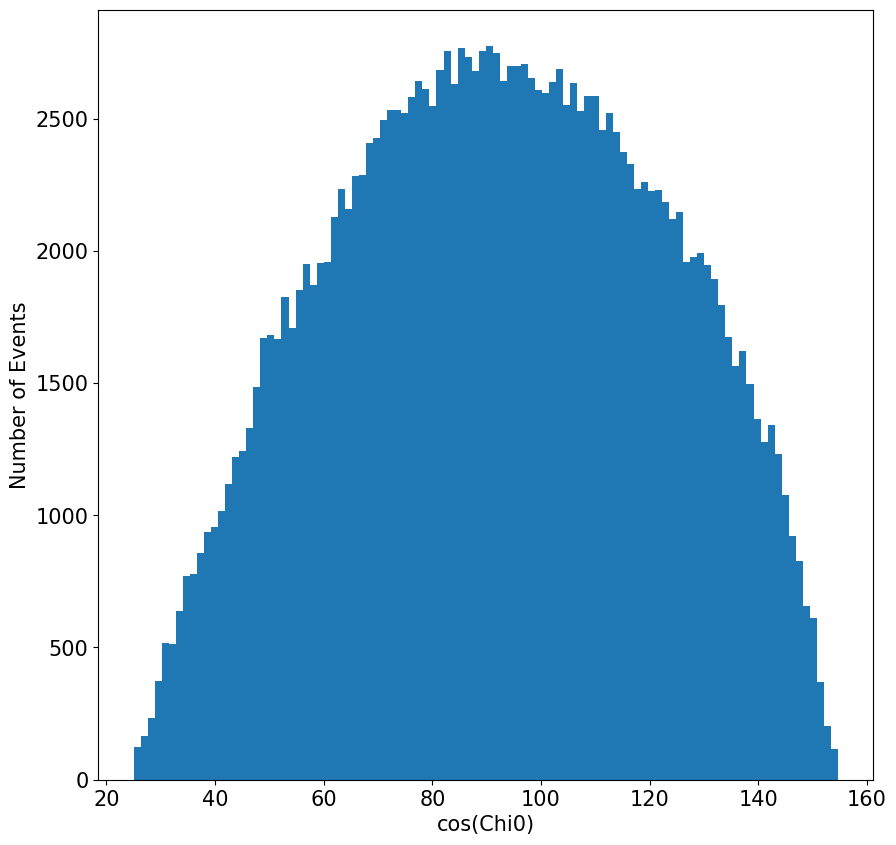

In [26]:
# Plotting the Chi0 distribution
plt.figure()
X = (Chi0.numpy())/np.pi*180
plt.hist(X, bins=100)
plt.xlabel('cos(Chi0)')
plt.ylabel('Number of Events')
plt.show()

In [27]:
print(min(X),max(X))

25.001053 154.67815


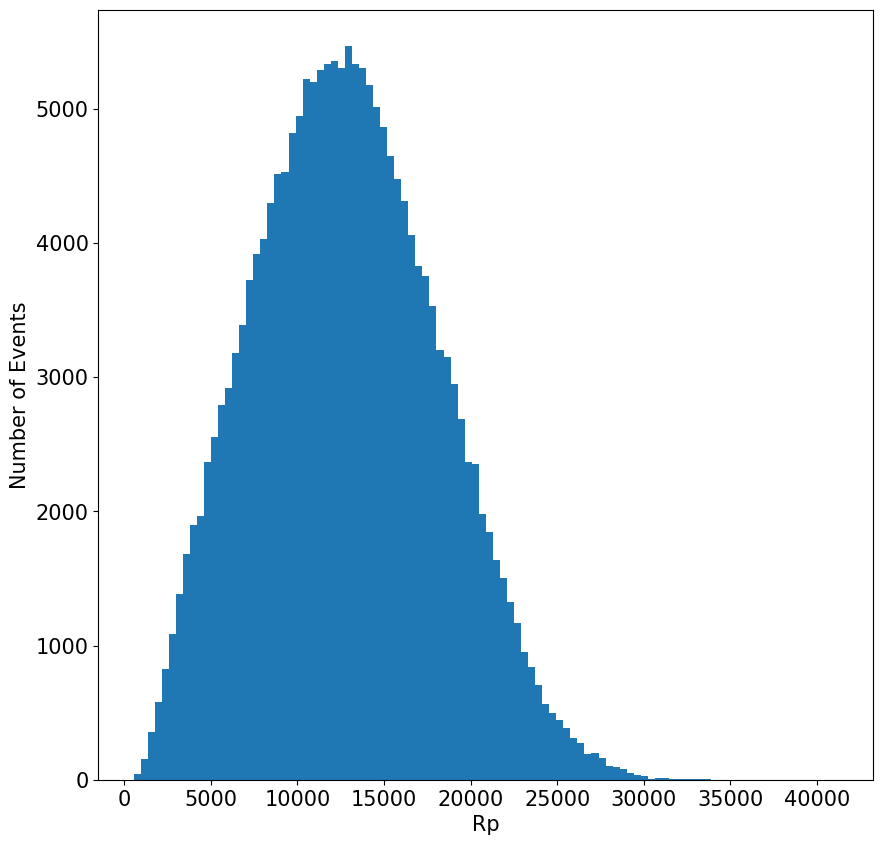

In [7]:
# Plotting the Rp distribution
plt.figure()
X = Rp.numpy()
plt.hist(X, bins=100)
plt.xlabel('Rp')
plt.ylabel('Number of Events')
plt.show()


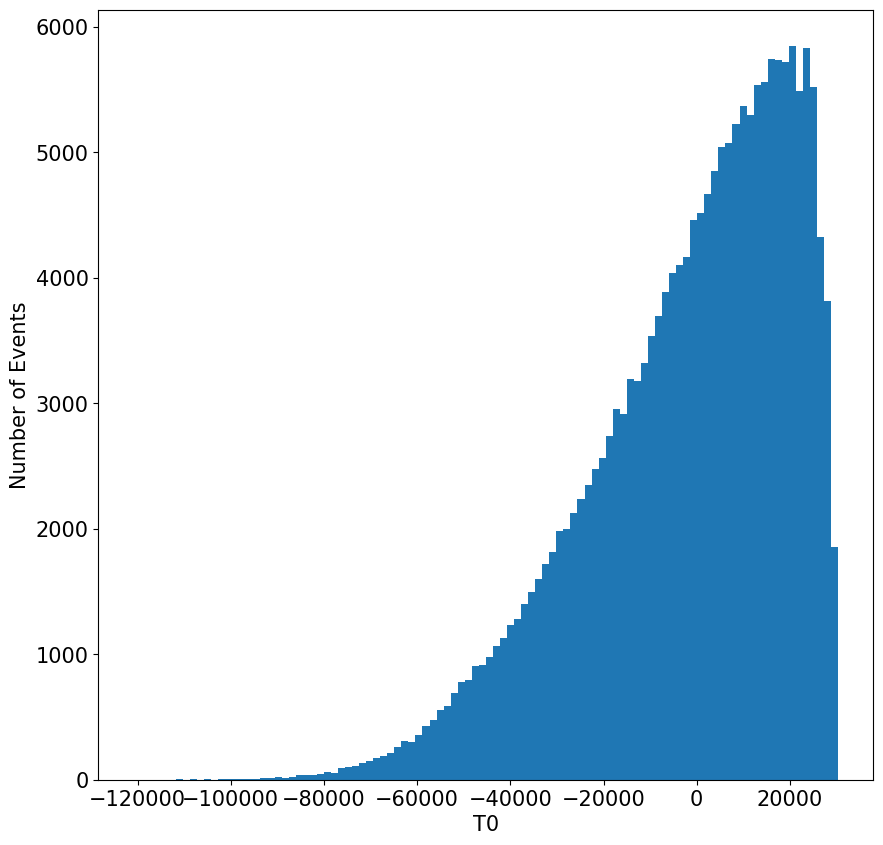

In [8]:
# Plotting the T0 distribution
plt.figure()
X = T0.numpy()
plt.hist(X, bins=100)
plt.xlabel('T0')
plt.ylabel('Number of Events')
plt.show()


# Correlation plots

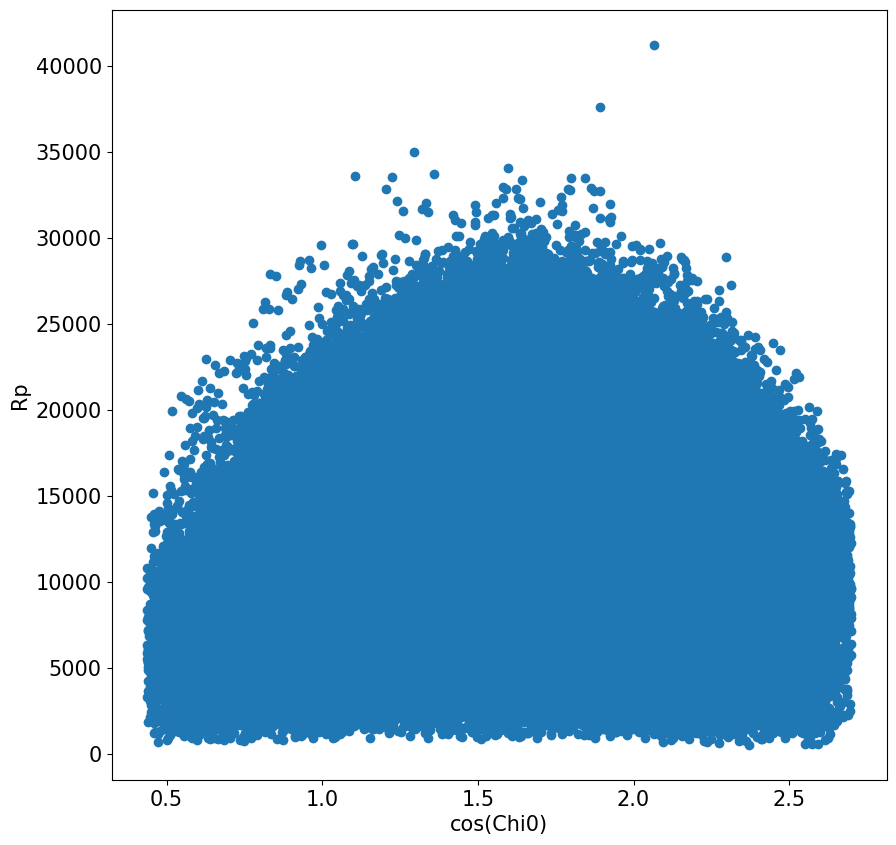

In [9]:
# Testing for Correlations between Chi0 and Rp
X = Chi0.numpy()
Y = Rp.numpy()
plt.figure()
plt.scatter(X,Y)
plt.xlabel('cos(Chi0)')
plt.ylabel('Rp')
plt.show()

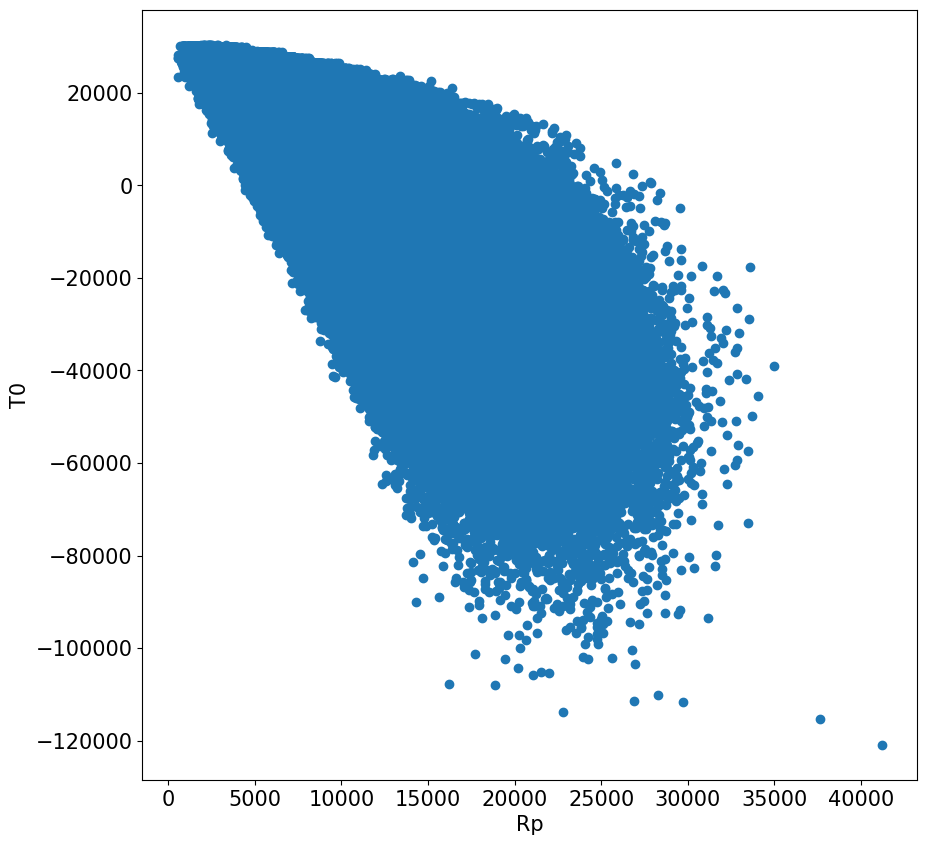

In [10]:
# Plotting the correlation between Rp and T0
plt.figure()
X = Rp.numpy()
Y = T0.numpy()
plt.scatter(X, Y)
plt.xlabel('Rp')
plt.ylabel('T0')
plt.show()


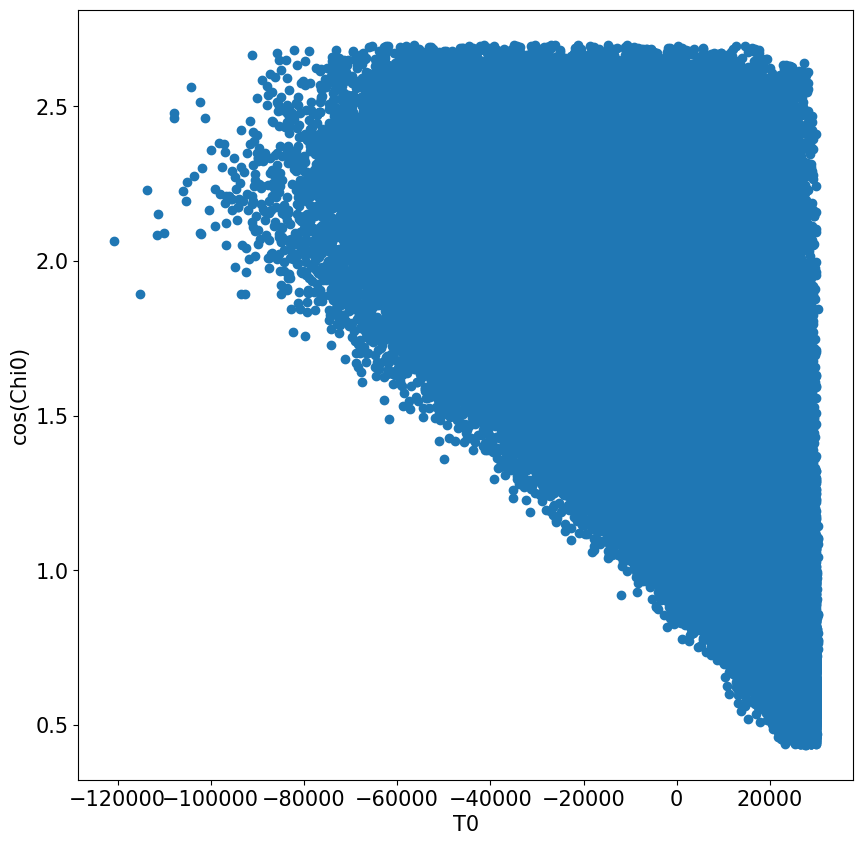

In [21]:
# Plotting the correlation between T0 and cos(Chi0)
plt.figure()
X = T0.numpy()
Y = Chi0.numpy()
plt.scatter(X, Y)
plt.xlabel('T0')
plt.ylabel('cos(Chi0)')
plt.show()


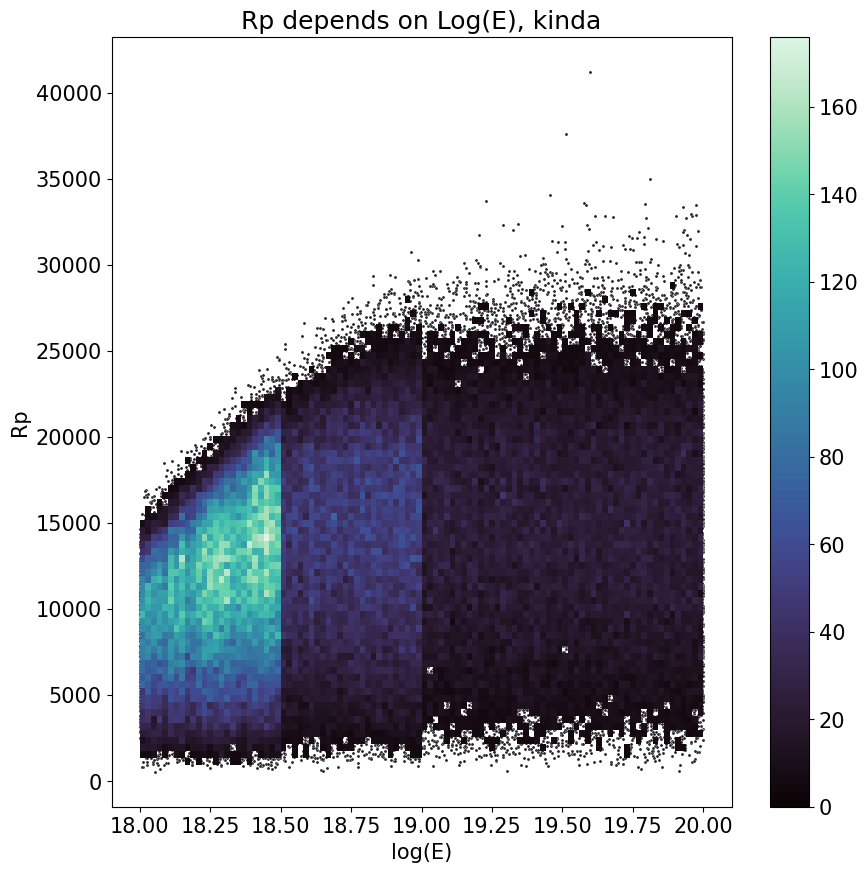

In [20]:
# Rp vs logE plot
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot for the first subplot
X = E.numpy()
Y = Rp.numpy()

sns.scatterplot(x=X, y=Y, ax=ax, s=5,color='.15')
sns.histplot(x=X, y=Y, ax=ax, bins=100, pthresh=.01,cmap = 'mako',cbar = True)
ax.set_xlabel('log(E)')
ax.set_ylabel('Rp')
ax.set_title('Rp depends on Log(E), kinda')
plt.show()

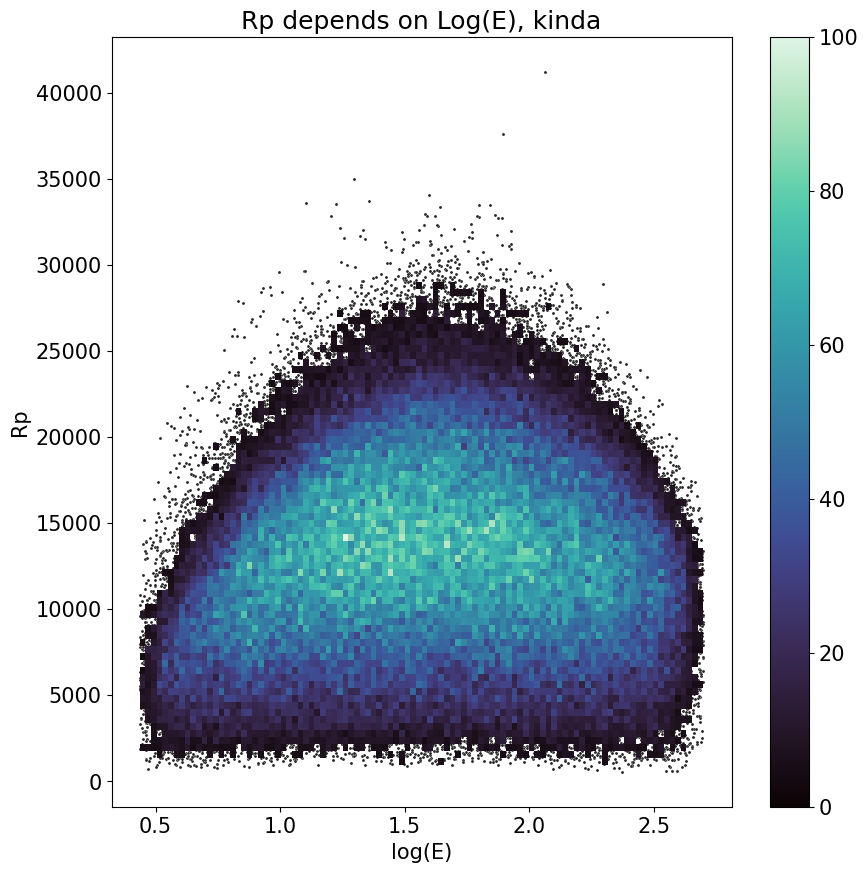

In [28]:
# Rp vs Chi0 plot

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Scatter plot for the first subplot
X = Chi0.numpy()
Y = Rp.numpy()

sns.scatterplot(x=X, y=Y, ax=ax, s=5,color='.15')
sns.histplot(x=X, y=Y, ax=ax, bins=100, pthresh=.01,cmap = 'mako',cbar = True)
ax.set_xlabel('log(E)')
ax.set_ylabel('Rp')
ax.set_title('Rp depends on Log(E), kinda')
plt.show()

# Normalising the variables

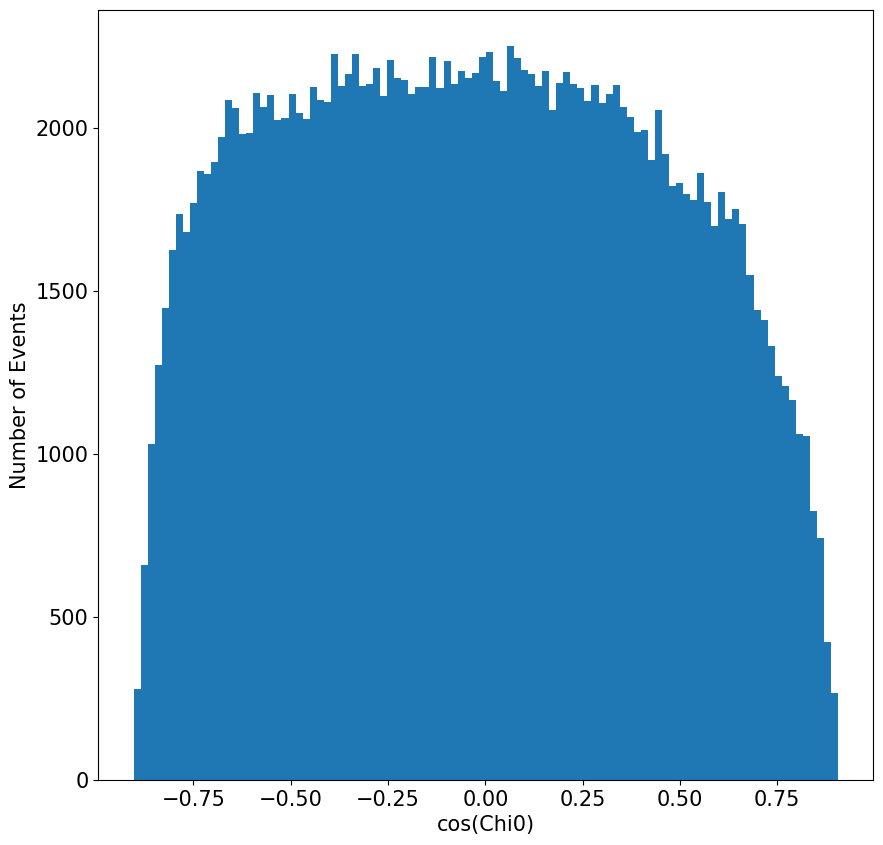

In [24]:
# Plot the normalised Chi0 - normalise by cos(Chi0)
plt.figure()
X = np.cos(Chi0.numpy())

plt.hist(X, bins=100)
plt.xlabel('cos(Chi0)')
plt.ylabel('Number of Events')
plt.show()


Mean Rp: 12854.51953125
Std Rp: 5280.8662109375


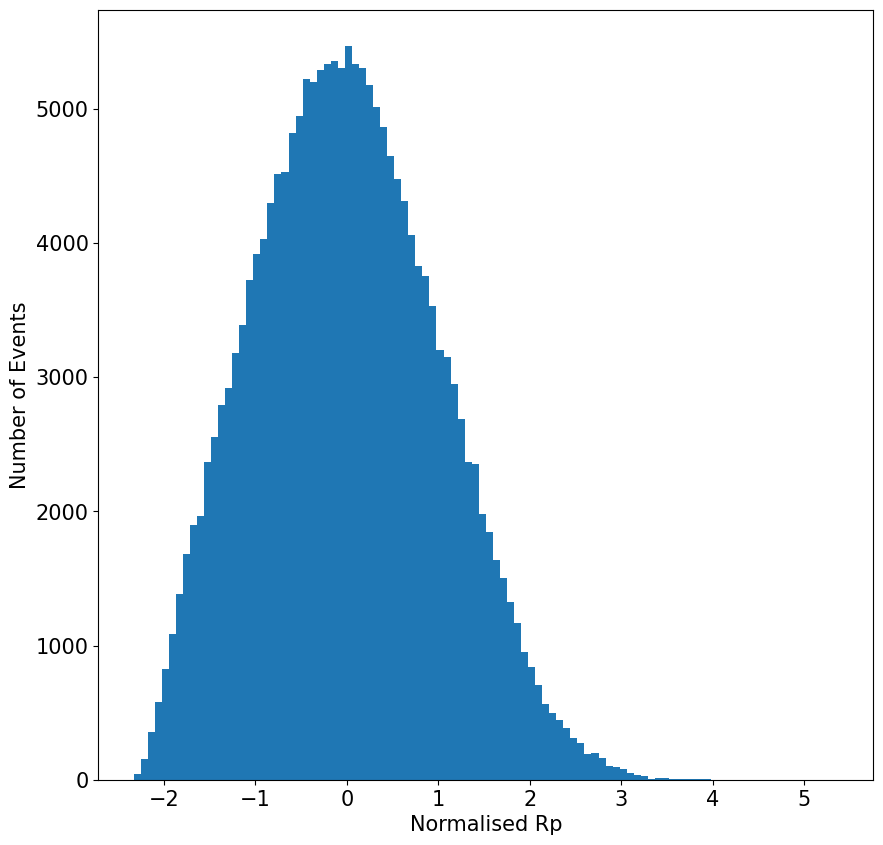

In [29]:
# Plot the normalised Rp - normalise by mean and std

RpMean = Rp.mean()
print(f'Mean Rp: {RpMean}')
RpStd  = Rp.std()
print(f'Std Rp: {RpStd}')
X = (Rp-RpMean)/RpStd

plt.figure()
plt.hist(X.numpy(), bins=100)
plt.xlabel('Normalised Rp')
plt.ylabel('Number of Events')
plt.show()


# Input Features

156778


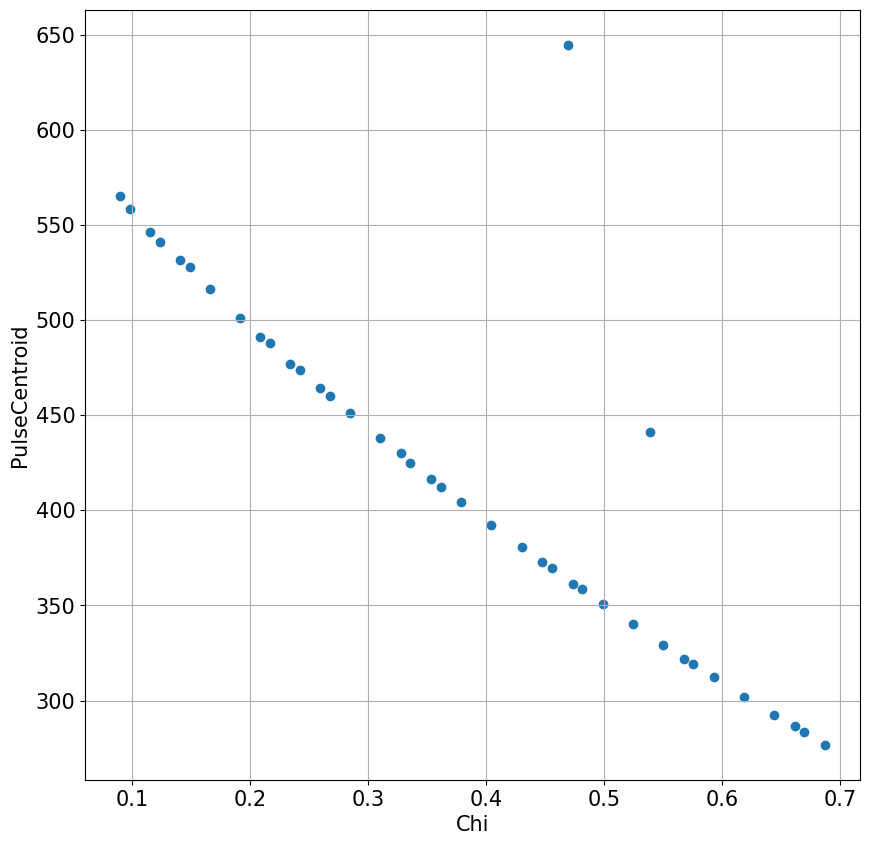

In [131]:
# Time Fit Plot
N = torch.randint(0, len(dataset), (1,)).item()
print(N)
Event = dataset.GetEventsByIndex(N)

X = Event.PixelObservables.Chi
Y = Event.PixelObservables.PulseCentroid



plt.figure()
plt.scatter(X,Y)
plt.xlabel('Chi')
plt.ylabel('PulseCentroid')
plt.grid()

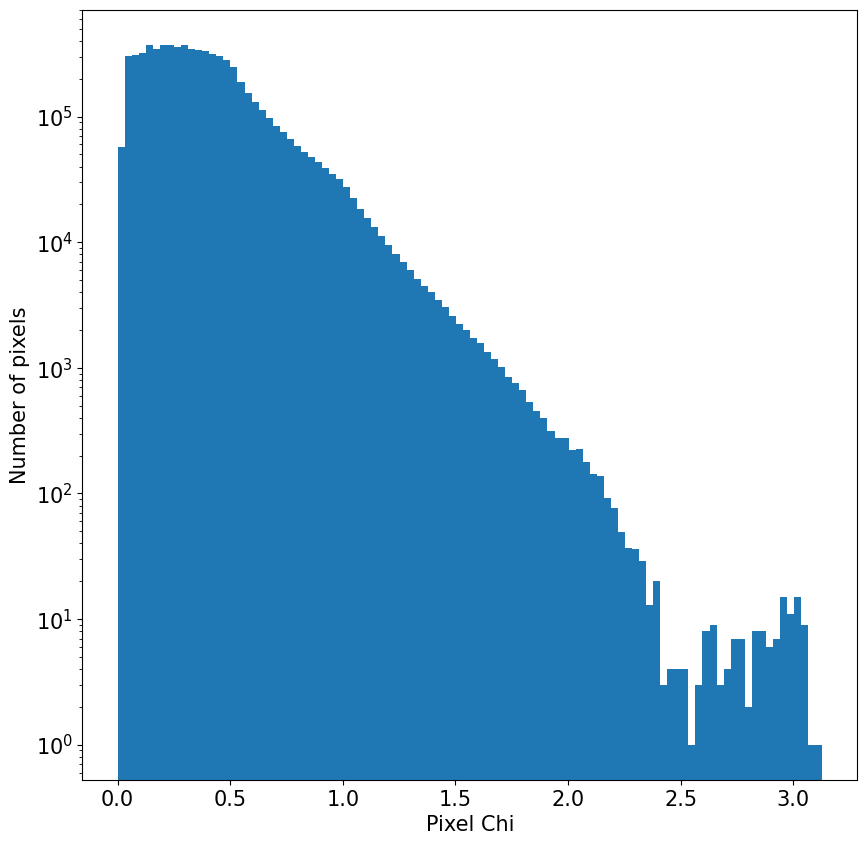

In [175]:
# All Pixel Chi Distribution
ALL_Chi = dataset._pixelData[:,5]
plt.figure()
X = ALL_Chi.numpy()
plt.hist(X, bins=100)
plt.xlabel('Pixel Chi')
plt.ylabel('Number of pixels')
plt.yscale('log')
plt.show()


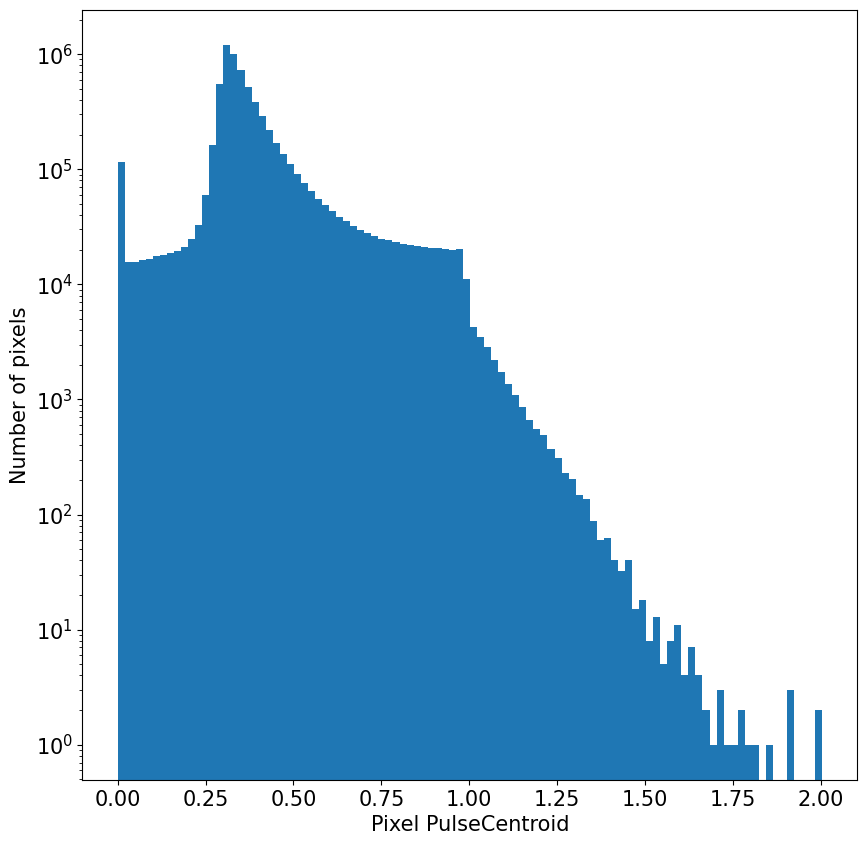

In [177]:
# All Pixel PulseCentroid Distribution
ALL_PC = dataset._pixelData[:,7]
X = ALL_PC.numpy()/1000
plt.figure()
plt.hist(X, bins=100)
plt.xlabel('Pixel PulseCentroid')
plt.ylabel('Number of pixels')
plt.yscale('log')
# plt.axvline(200, color='r')
plt.show()


tensor(3.2299)


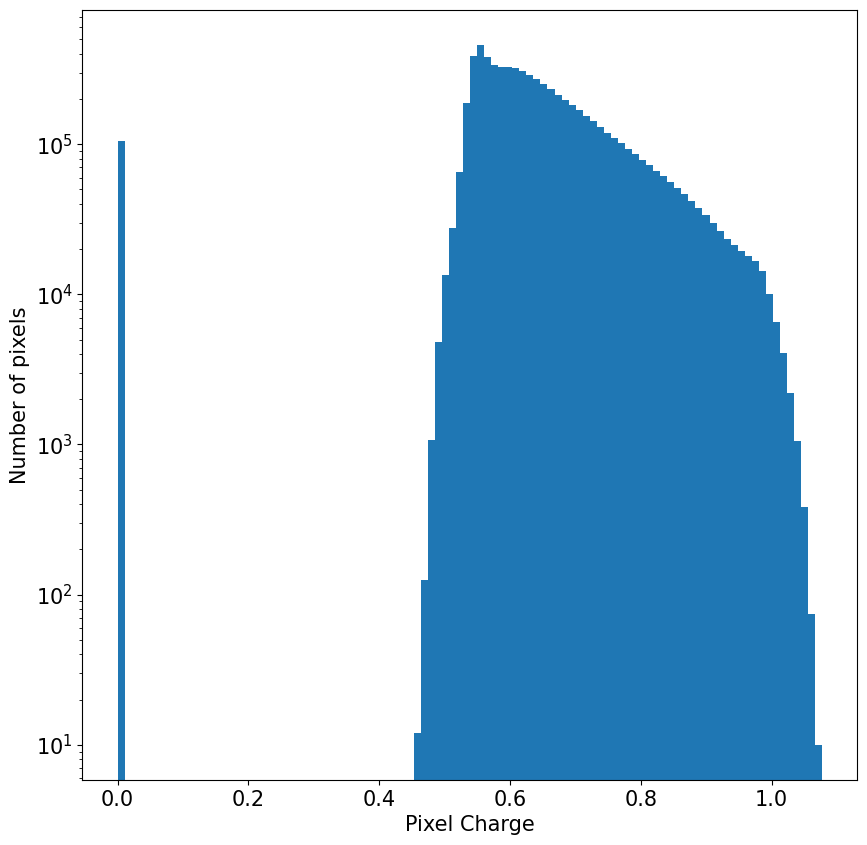

In [96]:
# All Pixel Charge Distribution
ALL_Q = dataset._pixelData[:,4]
print(torch.log10(ALL_Q+1).mean())
# X= torch.log10(ALL_Q+1).numpy()
X = ((torch.log10(ALL_Q+1)/5)).numpy()
plt.figure()
plt.hist(X, bins=100)
plt.xlabel('Pixel Charge')
plt.ylabel('Number of pixels')
plt.yscale('log')

Masks are same False


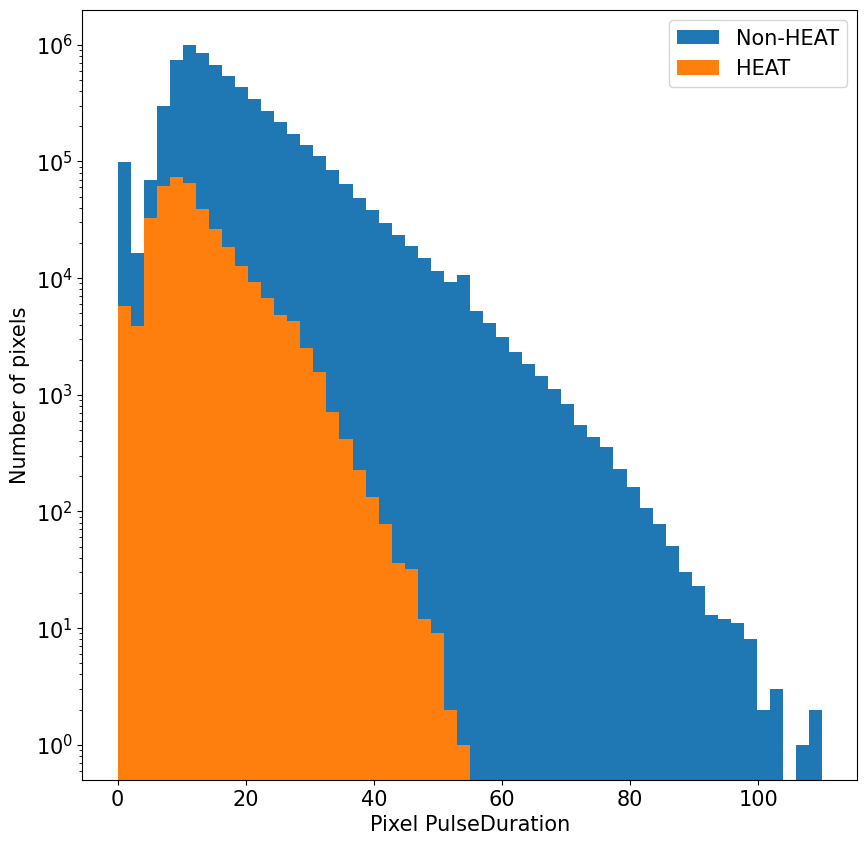

In [178]:
# ALL Pixel PulseDuration Distribution
ALL_PD = dataset._pixelData[:,8] - dataset._pixelData[:,6]
ALL_TelId = dataset._pixelData[:,1]
ALL_EyeId = dataset._pixelData[:,2]
Elevation = dataset._pixelData[:,10]
Mask = (ALL_TelId == 7) | (ALL_TelId == 8) | (ALL_TelId == 9) | (ALL_EyeId == 5)
Mask2 = (Elevation>30)

print(f'Masks are same {torch.all(Mask == Mask2)}')

ALL_PD[Mask] = ALL_PD[Mask]/2
plt.figure()
X = ALL_PD[~Mask].numpy()
plt.hist(X, bins=np.linspace(0,110,55), label = 'Non-HEAT')
X = ALL_PD[Mask].numpy()
plt.hist(X, bins=np.linspace(0,110,55), label = 'HEAT')
plt.xlabel('Pixel PulseDuration')
plt.ylabel('Number of pixels')
plt.legend()
plt.yscale('log')

(array([1.05598e+05, 1.17005e+05, 2.90000e+01, 1.31100e+03]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <BarContainer object of 4 artists>)

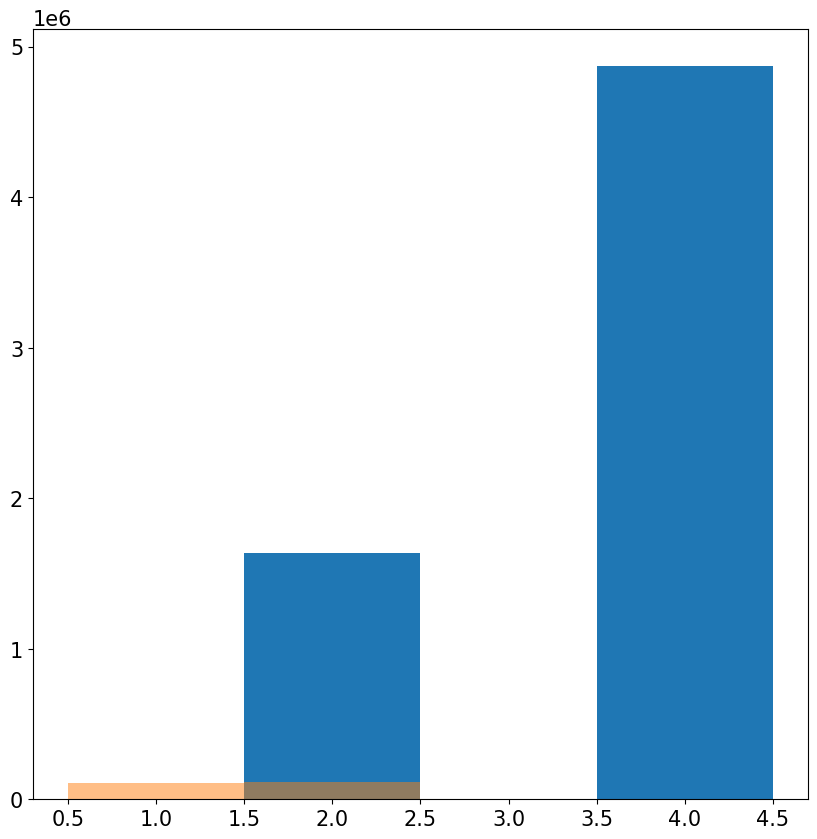

In [145]:
PixelTimes = ALL_PC
PixelStatus = dataset._pixelData[:,3]
Mask  =PixelTimes <150
plt.hist(PixelStatus[~Mask].numpy(), bins = np.linspace(0.5,4.5,5))
plt.hist(PixelStatus[Mask].numpy(), bins = np.linspace(0.5,4.5,5),alpha = 0.5)
# plt.yscale('log')
# plt.show()

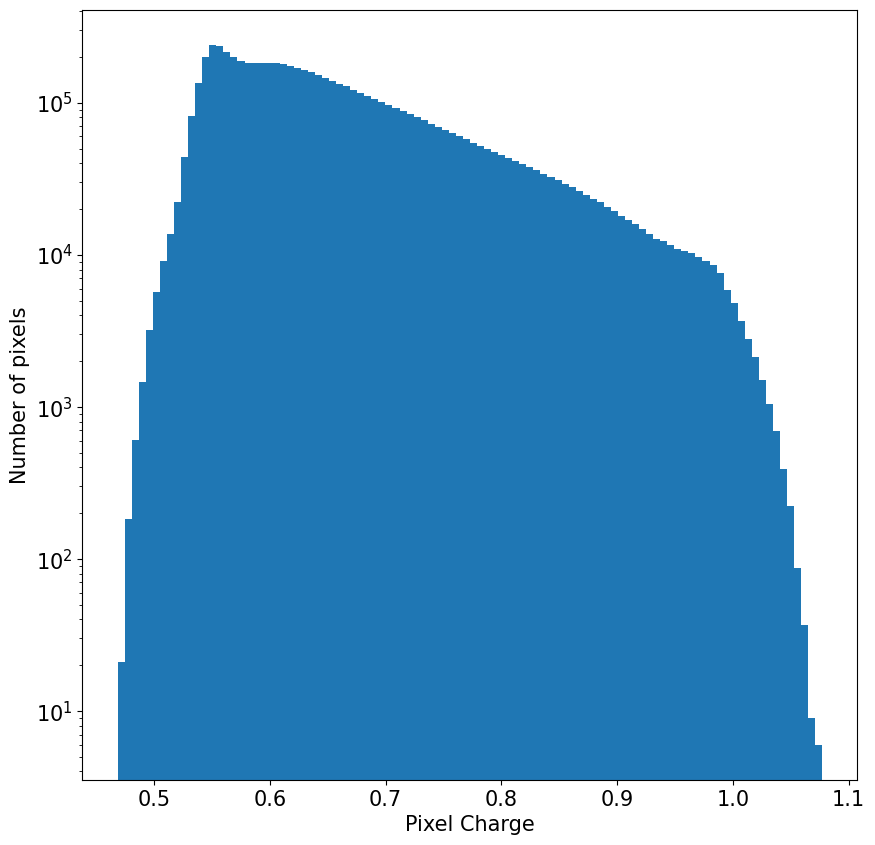

In [147]:
# All Pixel Charge Distribution with Mask
ALL_Q = dataset._pixelData[:,4]
Mask = dataset._pixelData[:,7] < 200

X = ((torch.log10(ALL_Q+1)/5)).numpy()
plt.figure()
plt.hist(X[~Mask], bins=100)
plt.xlabel('Pixel Charge')
plt.ylabel('Number of pixels')
plt.yscale('log')
plt.show()


In [163]:
dataset.Load(DataPath,'Test')
Event = dataset.GetEventsByIndex(0)
Event.ShowEvent(True)

Event Data ------------------------------------------------------------
Station Data
            TotalSignal : 3578.9 (VEM)
            Time        : 721.92 (ns)
            Phi         : 139.10 (deg)
            Theta       : 91.218 (deg)
            Distance    : 13033. (m)
Shower Info
            Unique ID   : 100600101
            Primary     : iron
Gen Event Info
            logE        : 19.912 ([eV])
            cosZenith   : 48.910 (deg)
            Xmax        : 761.05 (g/cm^2)
            dEdXmax     : 123.34 (PeV/g/cm^2)
Rec Event Info
            logE        : 19.920 ([eV])
            cosZenith   : 49.133 (deg)
            Xmax        : 751.75 (g/cm^2)
            dEdXmax     : 122.10 (PeV/g/cm^2)
            UspL        : 238.65 (g/cm^2)
            UspR        : 0.2484 ()
Gen Geometry
            SDPPhi      : -129.9 (deg)
            SDPTheta    : 89.386 (deg)
            Chi0        : 121.26 (deg)
            Rp          : 11178. (m)
            T0          : 4575.7 (n

In [181]:
AllStationCharge = dataset._otherData[:,0].numpy()

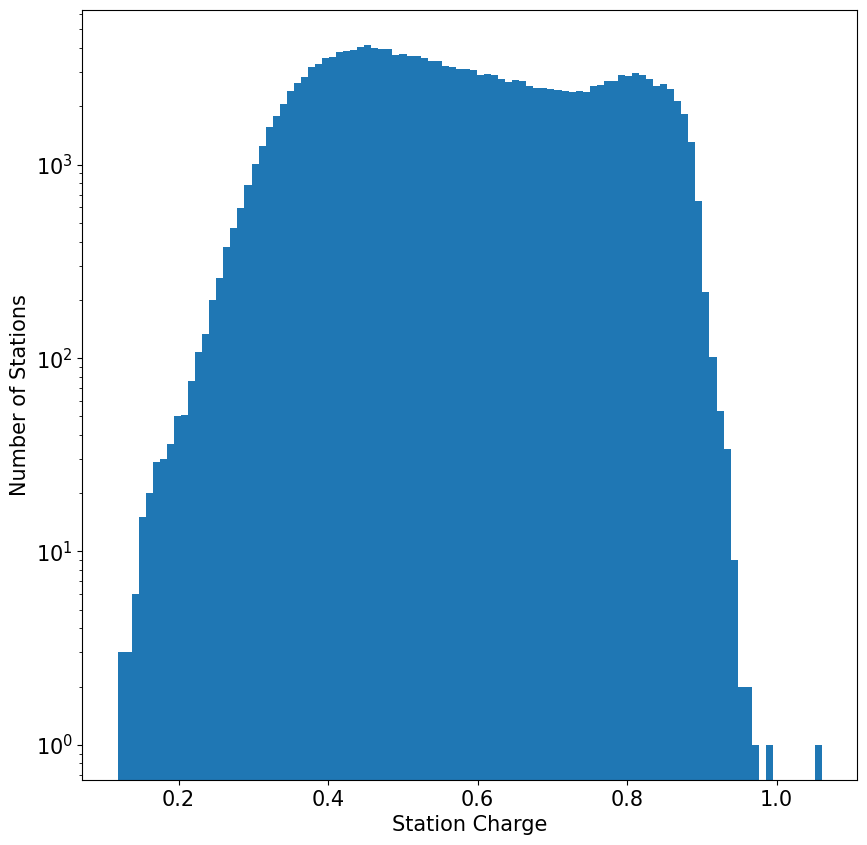

In [185]:
X = np.log10(AllStationCharge+1)/4
plt.figure()
plt.hist(X, bins=100)
plt.xlabel('Station Charge')
plt.ylabel('Number of Stations')
plt.yscale('log')
plt.show()